<a href="https://colab.research.google.com/github/LuisMig-code/KMeans-Tutorial/blob/main/KMEANS_TUTORIAL_FIFA21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans - Tutorial
## Aplicando o KMeans para fazer agrupamentos

Para o Notebook de hoje iremos debater um pouco sobre o KMeans e o agrupamento de dados! Hoje iremos ver a parte teórica e a aplicação prática , fazendo agrupamento de jogadores do FIFA21, *Let's go* !

<img src="https://images.pexels.com/photos/667221/pexels-photo-667221.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width = 750>

## Como funciona?

Anteriormente já escrevi um artigo sobre o KNN (o KMeans é derivado desse algoritmo) , caso queira acessar , clique aqui. Não é obrigatório , mas seria muito bom se você já soubesse um pouco desse algoritmo!

**O KMeans é um algoritmo de aprendizado não-supervisionado** , ou seja , não o usamos para fazer classificações , e sim para "criar" classificações! Ele cria *clusters* com nossos dados!

**Cluster? o que é "Cluster"?** Como o próprio nome sugere , clusters são grupos . Ou seja , Cluster são espécies de agrupamentos dos nossos dados!

O algoritmo do KMeans basicamente faz esses agrupamentos a partir de características em comuns dos dados , definidas pela **distância Euclidiana** entre nossas amostras (nossos dados).

A partir dos nossos dados numéricos calculamos essa distancia entre os dados e definimos os grupos. Cada grupo tem um **centróide**. Centróides , de acordo com a gemométria é:



> *Pode-se dizer que o centroide é o ponto no qual, se uma linha o cruza, fica dividido em dois segmentos da mesma proporção em relação à reta em questão. No caso de triângulos (polígonos que têm três lados e três ângulos), o centroide está na interseção de suas três medianas.*

Para nossa situação , diremos que centróide é o ponto central (ou uma amostra central) de cada cluster. Ou seja , cada Cluster tem um centróide.

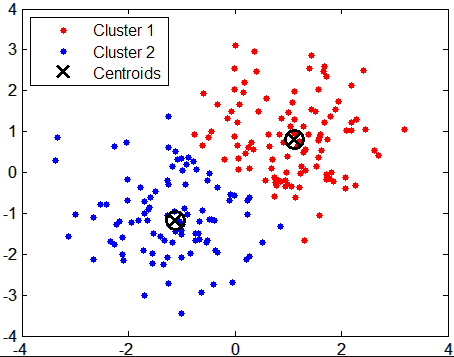





Na figura podemos ver 2 clusters (um em azul e o outro em vermelho) , no qual cada um deles tem um **centróide** associado a eles.

A partir desse centróide podemos *clusternizar* nossos dados. **Mas como?**

Simples, dado uma nova amostra que queremos associar a um cluster , iremos **calcular a distancia desta amostra de teste até cada um dos clusters que temos**. Com o valor da distância podemos verificar qual o centróide mais próximo e assim definir de qual grupo nosso dado de teste pertence!

## Quando e Por que utilizar ?

* Por que?

Usamos algoritmos de *Clusternização* quando precisamos **agrupar nossos dados , baseado em algumas features**. É comum ter uma grande base de dados , com diferentes tipos de dados , e precismos de alguma maneira dividir esses dados , para isso usamos o KMeans!

* Quando?

A preferência é de se usar o KMeans quando se trata de **dados numéricos contínuos , não categóricos** , a fim de ter "melhores resultados". Isso por que  como não estamos classificando dados , e sim agrupando , **não há uma métrica de avaliação precisa para o KMeans** , mas a recomendação é usar dados numéricos contínuos. 

## Exemplo prático:

Chegou a hora de colocar a mão na massa e desenvolver um projeto com o conhecimento que acabamos de receber.

***NOTA*: Vou levar em consideração que você já saiba o básico de python para Machine Learning e não explicarei passo a passo alguns métodos comuns na área , como a divisão de dados em treino e teste, por exemplo.**

Vamos começar importando as bibliotecas que serão usadas para nosso projeto:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# lendo nossos dados:
path = "https://raw.githubusercontent.com/LuisMig-code/KMeans-Tutorial/main/data/players_21.csv"
df = pd.read_csv(path)

[Neste conjunto de dados do FIFA 21](https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset) temos diversas features , mas somente algumas delas nos interessa , portanto gostaria de começar separando-as

In [ ]:
lista_completa = ["player_positions","player_traits" ,"team_position","club_name","ls",	"st",	"rs",	"lw",	"lf",	"cf",	"rf",	"rw",	"lam",	"cam"	,"ram"	,"lm"	,"lcm",	"cm",	"rcm"	,"rm",	"lwb",	"ldm",	"cdm",	"rdm",	"rwb"	,"lb",	"lcb"	,"cb",	"rcb" ,	"rb" , "sofifa_id","player_url","short_name","long_name","dob","league_name","wage_eur","body_type","real_face","player_tags","team_jersey_number","loaned_from","joined","contract_valid_until","nation_position","nation_jersey_number"]

In [ ]:
df = df.drop(lista_completa , axis=1)

In [ ]:
df.head(5)

,age,height_cm,weight_kg,nationality,league_rank,overall,potential,value_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,170,72,Argentina,1.0,93,93,67500000,Left,5,4,4,Medium/Low,138400000.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,35,187,83,Portugal,1.0,92,92,46000000,Right,5,4,5,High/Low,75900000.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,27,188,87,Slovenia,1.0,91,93,75000000,Right,3,3,1,Medium/Medium,159400000.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90
3,31,184,80,Poland,1.0,91,91,80000000,Right,4,4,4,High/Medium,132000000.0,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10
4,28,175,68,Brazil,1.0,91,91,90000000,Right,5,5,5,High/Medium,166500000.0,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11


In [ ]:
# nome das colunas que estão em formato de texto
colunas_em_format_txt = ["nationality","preferred_foot","work_rate"]

In [ ]:
# aplicando o LabelEncoder nas colunas de texto:
codificador = LabelEncoder()

for coluna in colunas_em_format_txt:
  codificador.fit(df[coluna])
  df[coluna] = codificador.transform(df[coluna])

In [ ]:
# fazendo uma cópia do dataset e preenchendo os valores faltantes por 0 
dados = df.copy().fillna(0)

In [ ]:
# instanciando o modelo
kmeans = KMeans(n_clusters = 5)

O KMeans tem poucos argumentos , mas o principal que queremos é esse:

- ***n_clusters***: Quantidade de grupos que queremos para fazer os agrupamentos

In [ ]:
# treinando o modelo com nossos dados
kmeans.fit(dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# calculando as distâncias
dist = kmeans.fit_transform(dados)
dist

array([[1.52579224e+08, 9.25037039e+07, 1.42405191e+08, 2.71169389e+07,
        1.26389197e+08],
       [8.73402711e+07, 2.77391988e+07, 7.71807641e+07, 3.89800790e+07,
        6.12543386e+07],
       [1.74761093e+08, 1.14718512e+08, 1.64592978e+08, 4.94160281e+07,
        1.48580790e+08],
       ...,
       [1.34430747e+06, 6.14350100e+07, 1.15212180e+07, 1.27006503e+08,
        2.75335164e+07],
       [1.33487355e+06, 6.14256094e+07, 1.15118040e+07, 1.26997099e+08,
        2.75241171e+07],
       [1.35544151e+06, 6.14461897e+07, 1.15323934e+07, 1.27017682e+08,
        2.75446963e+07]])

Com o parâmetro *fit_transform()* podemos passar amostras de dados e calcular a **distância de cada uma para cada centróide de cluster**.

In [ ]:
dist[0]

array([1.52579224e+08, 9.25037039e+07, 1.42405191e+08, 2.71169389e+07,
       1.26389197e+08])

In [ ]:
for i,z in zip(dist[0],range(0,len(dist[0]))):
  print("A distância entre a amostra 1 e o cluster {} é {}".format( z,round(i) ) )

A distância entre a amostra 1 e o cluster 0 é 152579224
A distância entre a amostra 1 e o cluster 1 é 92503704
A distância entre a amostra 1 e o cluster 2 é 142405191
A distância entre a amostra 1 e o cluster 3 é 27116939
A distância entre a amostra 1 e o cluster 4 é 126389197


Para checarmos o centróide basta usarmos o parâmetro *cluster_centers_* , e com ele temos as coordenadas de cada cluster.

In [ ]:
kmeans.cluster_centers_[0]

array([2.49818539e+01, 1.81196561e+02, 7.48816065e+01, 7.95846076e+01,
       1.39540638e+00, 6.36182349e+01, 6.95200812e+01, 7.43446672e+05,
       7.67908128e-01, 1.02817080e+00, 2.89156779e+00, 2.25791511e+00,
       5.95476175e+00, 1.19948233e+06, 5.89230379e+01, 4.42199734e+01,
       4.84455936e+01, 5.32811370e+01, 4.39638348e+01, 5.58831927e+01,
       7.41006281e+00, 7.15976144e+00, 7.04701478e+00, 7.51011992e+00,
       4.21381892e+00, 7.17016687e+00, 4.72702240e+01, 4.36420912e+01,
       5.02679399e+01, 5.64071442e+01, 4.04679272e+01, 5.31072267e+01,
       4.46494512e+01, 4.03015672e+01, 5.03587336e+01, 5.61070998e+01,
       6.30961868e+01, 6.31469450e+01, 6.19856608e+01, 5.92378656e+01,
       6.31399023e+01, 5.54891822e+01, 6.37691136e+01, 6.08939788e+01,
       6.38983567e+01, 4.42545524e+01, 5.35986930e+01, 4.44691961e+01,
       4.79454984e+01, 5.15167185e+01, 4.64008629e+01, 5.54238944e+01,
       0.00000000e+00, 4.60055834e+01, 4.41830468e+01, 1.66030074e+01,
      

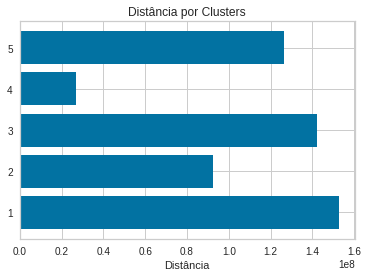

In [ ]:
x = range(1,6)
plt.barh(x,dist[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters')
plt.show()

In [ ]:
# verificando as labels 
labels = kmeans.labels_
labels

array([3, 1, 3, ..., 0, 0, 0], dtype=int32)

In [ ]:
# armazenando os resultados da clusternização em uma coluna no DataFrame
df["classificação_KMeans"] = labels

In [ ]:
# verificando a quantidade de cada cluster classificado
df.classificação_KMeans.value_counts()

0    15761
2     2143
4      788
1      197
3       55
Name: classificação_KMeans, dtype: int64

In [ ]:
# verificando o tamanho do DataSet
df.shape

(18944, 61)

**Mas como saber o o número certo de clusters?**

Conforme aumentamos o número de cluster , a diferença entre cada grupo vai se tornando mais sutíl e sensível.

A ideia central é que existe um número "ideal" de cluster , de forma que tenhamos grupos suficientes que sejam ligeiramente diferentes uns dos outros e ao mesmo tempo consigo diferenciar bem nossas amostras.

O que queremos é uma forma de medir o quão bom vai nosso modelo a partir da distancia, ou seja , queremos que **a distância entre cada amostra e o centróide do cluster seja a menor possível , mas ao mesmo tempo seja longe daqueles as quais não pertence**.

Para isso usamos uma métrica conhecida como soma dos quadrados intra-clusters , ou *within-clusters sum-of-squares*.

In [ ]:
def calculate_wcss(data):
    wcss = []
    clusters = []
    for n in range(2, 25):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)

        wcss.append(kmeans.inertia_)
        clusters.append(n)

    return clusters , wcss

In [ ]:
# buscando novamente os dados
dados = df.copy().fillna(0)

In [ ]:
clusters , wcss = calculate_wcss(dados)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


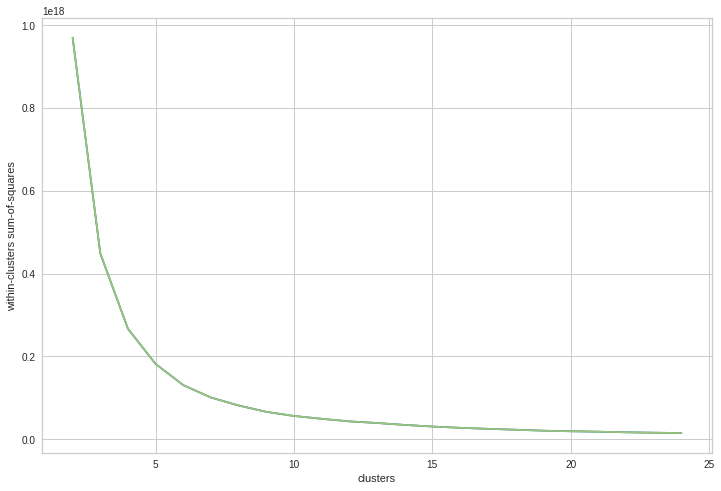

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(clusters,wcss)
ax.set_xlabel("clusters")
ax.set_ylabel("within-clusters sum-of-squares")
plt.plot(clusters,wcss)
ax=ax

Podemos visualizar agora um gráfico que relaciona no valor de WCSS (*within-clusters sum-of-squares*) e o número de clusters.


**Tá , mas e daí? como vamos saber qual o n_cluster "correto" ?**

Este gráfico representa o **método do cotovelo**! Com ele podemos verificar onde se "flexiona" o *cotovêlo do gráfico* (linha) e decidir o valor correto de *n_clusters*.


Podemos identificar que a maior "flexão" da linha se dá entre 5 e pouco menos de 9. Portantato , o número de cluster deverá estar neste intervalo!

**Método do cotovelo com o YellowBrick:**

Apesar disso , existe outra maneira de visualizar o melhor valor de cluster. Vamos usar a biblioteca YellowBrick para ter uma visualização amis precisa e decidir qual n_cluster usar:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb8ff42c10>,
                 k=None, metric=None, model=None, timings=True)

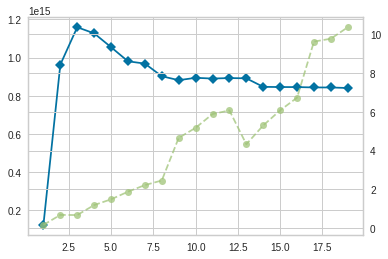

In [ ]:
# Instanciando o modelo
model = KMeans(init = 'random' , random_state=28)

# visualizando
visualizer = KElbowVisualizer(model, k=(1,20) , locate_elbow=True)

visualizer.fit(dados)

A **linha azul** é o que buscamos. 

Podemos ver que ela passa a diminuir a partir do valor de 3 e se "estabiliza" no valor de 8 (aproximadamente) , portanto , podemos afirmar que o *n_cluster* mais ideal (ou mais próximo disso) é o 8.

A **linha verde** representa o tempo de treinamento com cada cluster.

In [ ]:
# instanciando o modelo com 8 clusters
kmeans = KMeans(n_clusters = 8 , random_state=28)
kmeans.fit(dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=28, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.labels_
df["classificação_KMeans"] = labels
df.classificação_KMeans.value_counts()

0    14444
6     2319
5     1151
2      622
1      252
4      100
3       42
7       14
Name: classificação_KMeans, dtype: int64

In [ ]:
df.shape

(18944, 61)

**Vamos visualizar gráficamente nossos grupos?**

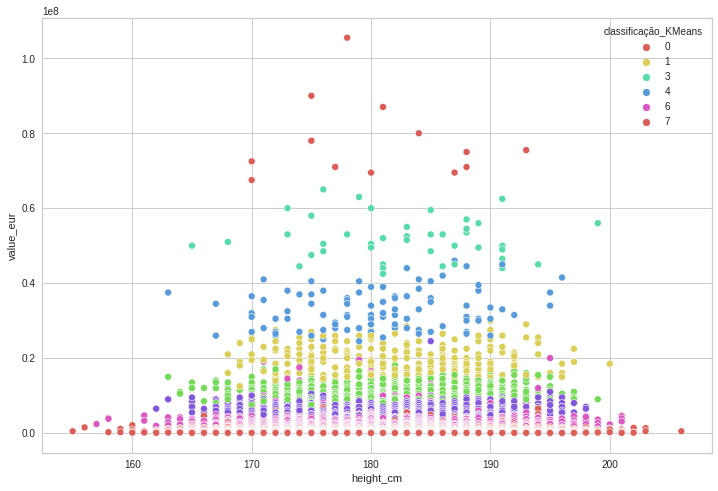

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df.height_cm , y=df.value_eur , hue=df.classificação_KMeans , palette = "hls")
ax=ax

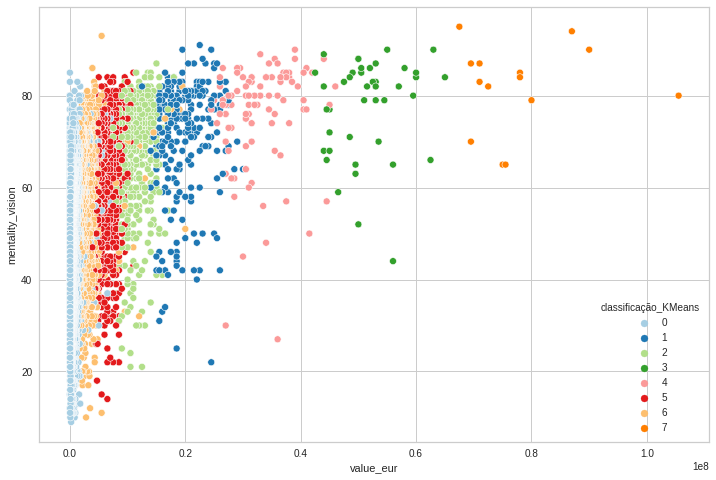

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df.value_eur , y=df.mentality_vision , hue=df.classificação_KMeans , palette = "Paired")
ax=ax

Já podemos visualizar a diferença entre nossos valores mediante algumas features e a classificação do **KMeans**